# Playing with Batchnorm without any training...

How do you explain these figures?

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import torch
from torch import nn

torch.manual_seed(42);

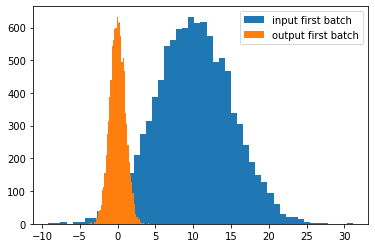

In [2]:
m = torch.nn.BatchNorm1d(1, momentum=None)

# input data (mean 10, var 25)
x = 10+5*torch.randn(10000, 1)

# first batch
with torch.no_grad():
    y = m(x)
    
plt.hist(x.numpy(),bins=50,label='input first batch');
plt.hist(y.numpy(),bins=50,label='output first batch');
plt.legend(loc='upper right');

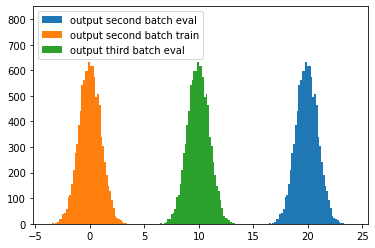

In [3]:
# second batch (mean 110, var 25)
# in eval mode
m.eval()
with torch.no_grad():
    y_eval = m(100+x)
# in train mode
m.train()
with torch.no_grad():
    y_train = m(100+x)

# third batch (mean 110, var 25)
m.eval()
with torch.no_grad():
    y_eval_3 = m(100+x)
    
plt.hist(y_eval.numpy(),bins=50,label='output second batch eval');
plt.hist(y_train.numpy(),bins=50,label='output second batch train');
plt.hist(y_eval_3.numpy(),bins=50,label='output third batch eval');
plt.ylim((0,850))
plt.legend(loc='upper left');